
# PROJECT: TMDb DATA ANALYSIS

## TABLE OF CONTENTS
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## INTRODUCTION

In this project, the data set I have chosen to  analyze is the TMDb data set. This data set contains a list of movies with data such as it's release year, popularity, voting, budget, revenue which will help in the analysis. 

From this data set, there are different varaibles available to be analyzed. I have focused on analyzing the following trends;

1. Movie release trend over the years
2. Popularity trend over the years
3. Revenue over the years
4. Runtime over the years

I'm also interested in analyzing to find how different variables influence the revenue which is the end goal in the movie making business. For the same, I have chosen the following variables to analyze the correlation; 

1. Revenue and Popularity
2. Revenue and Runtime
3. Revenue and Budget
4. Revenue and Vote Count

The analysis in the project is by using Python, in the below code cell,I have written statements to import the packages - numpy and pandas which has functions that is to be used in the analysis. Also, I have included the statements for visualization of the analysis and communicate the findings using plots. 




In [40]:
#Following statements help import  packages to be used in the analysis
import numpy as np 
import pandas as pd
#Following statements help visualizing the analysis using plots
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## DATA WRANGLING

Before analyzing the data, the important step is to make sure the data is clean by checking for any missing data, duplicate values or any other inefficiencies that might affect the results of the analysis. 

In order to perform Data wrangling, I have followed the steps below. 


### STEP 1: FILE LOADING

As the first step of the data wrangling process, I have loaded the TMDb file to be analyzed into a data frame. I have used the read_csv since the file to be read is a  CSV file and named the data frame as TMDb_data. 
 

In [41]:
#Read the dataset and load it into the dataframe 
TMDb_data = pd.read_csv('tmdb-movies.csv') 

The data is now loaded into the data frame. To get an idea of what the data contains, I have used the head function to look at the top 5 rows of the data set in the following cells. To know the total number of rows and columns, I have used the shape function. From the below cells, the data has 10866 rows and 21 columns.

In [42]:
#View the top 5 rows of the dataset 
TMDb_data.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [43]:
#Find the total number of rows and columns in the dataset
TMDb_data.shape

(10866, 21)

### STEP 2: DATA CLEANING

Once the data has been loaded into the data frame, the next step I have followed is to check if the data is clean. I have used the info function in the below cell to find out if there are null values in the data set.The imdb_id which is a unique identifier column has 10 null values. The other columns I'm interested in my analysis - budget, revenue, popularity, vote count,runtime have no null values. 

In [44]:
#Using the info function to check for null values
TMDb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Now, before, I drop the rows that has null Imdb_id values, I would like to see if there are rows that would help in the analysis. For the same purpose, I have used the isnull function the below cell. By running the following cell, the 10 rows has zero values in the budget, revenue column and dropping these 10 rows will not have any impact on our analysis. I have used the dropna function to drop rows with imdb_id null values. 

In [45]:
#View the rows in the dataset with null Imdb_id's
TMDb_data[TMDb_data.imdb_id.isnull()]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


In [46]:
#Drop the rows in the dataset with null Imdb_id's
TMDb_data.dropna(subset=['imdb_id'], inplace = True)


I'm also interested in finding if there are any duplicate rows, I'm using the duplicated function in the below cell and looks like there is one duplicate row. To drop the duplicate row, I have used the drop_duplicates function in the folowing cell.

In [47]:
#Find the number of duplicate rows in the dataset 
sum(TMDb_data.duplicated())

1

In [48]:
#Drop the duplicate row in the dataset 
TMDb_data.drop_duplicates(inplace=True)


Since in this project, I'm only interested in analyzing the data from the columns - budget, revenue, popularity, vote count,runtime, I'm dropping the other columns using the drop function. The data now looks relatively clean and we can proceed with further analysis. 

In [49]:
#Drop the additional columns in the dataset that are not a part of the analysis 
TMDb_data.drop(['cast','homepage', 'tagline','keywords','director','overview','production_companies','genres', 'budget_adj','revenue_adj', 'original_title', 'release_date','vote_average' ], axis=1, inplace = True)
TMDb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 8 columns):
id              10855 non-null int64
imdb_id         10855 non-null object
popularity      10855 non-null float64
budget          10855 non-null int64
revenue         10855 non-null int64
runtime         10855 non-null int64
vote_count      10855 non-null int64
release_year    10855 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 763.2+ KB


Before I begin the process of Exploratory Data Analysis,I have used the hist function to view the histograms of all the columbns to see how I can proceed with my analysis. I have also used the describe function to have an idea of the mean, standard deviation, minimum and maximum values. 

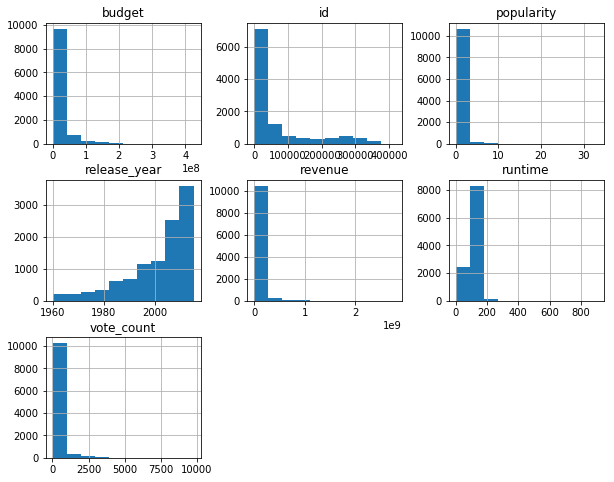

In [50]:
#View the histogram of the interested columns in the dataset
TMDb_data.hist(figsize=(10,8));

In [51]:
#View the mean, standard deviation, minimum, maximum vales of the interested columns in the dataset
TMDb_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,release_year
count,10855.000000,10855.000000,1.085500e+04,1.085500e+04,10855.000000,10855.000000,10855.000000
mean,65959.191617,0.646832,1.463776e+07,3.986359e+07,102.105205,217.584155,2001.313128
std,92018.246342,1.000591,3.092533e+07,1.170559e+08,31.348734,575.877532,12.815672
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1960.000000
25%,10591.500000,0.207733,0.000000e+00,0.000000e+00,90.000000,17.000000,1995.000000
50%,20618.000000,0.383998,0.000000e+00,0.000000e+00,99.000000,38.000000,2006.000000
75%,75393.500000,0.714446,1.500000e+07,2.404727e+07,111.000000,146.000000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis






In my project, in the step of Exploratory Data Analysis, I have split my analysis into two research questions as below.

### RESEARCH QUESTION 1

How is the trend of the number of movies released, popularity of the movies released, runtime of the movies released and revenue obtained over the years? 

In order to answer the above questions, I'm creating a new data frame to have the data grouped by realse year with funtions size since my point of interest is to find out of the number of movies released over the years and to answer the remaining part of the question to find trends on revenue, runtime and popularity, I have grouped the data by release yeard with the function mean to obtain the summary statistics on mean of the values over the years. 

#### NUMBER OF MOVIES RELEASED OVER THE YEARS

To find out this trend, I have created a data frame Movie_trend and grouped by release year with the size function. From the below line plot, it looks like the number of movies has increased over the years.

Text(0.5,1,'Movie Release Trend Over The Years')

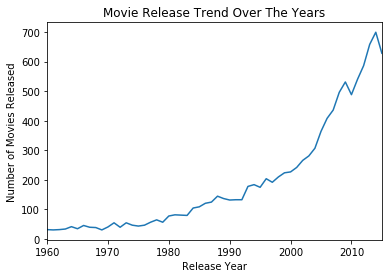

In [52]:
#Number of Movies released over the years 
Movie_trend = TMDb_data.groupby('release_year').size()
Release_Trend = Movie_trend.plot.line()
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.title('Movie Release Trend Over The Years')


#### POPULARITY OF THE MOVIES RELEASED OVER THE YEARS

To find out this trend, I have created a data frame Mean_trend and grouped by release year with the mean function. From the below line plot, it looks like the popularity of the movies released has increased over the years which makes sense since we saw the pattern of movie releases increasing over the years.

Text(0.5,1,'Popularity Trend Over The Years')

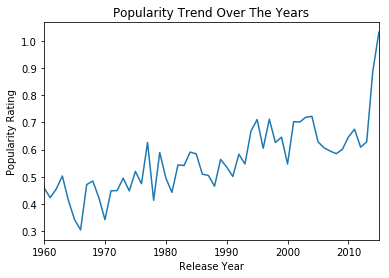

In [53]:
#Popularity of Movies released over the years 
Mean_trend = TMDb_data.groupby('release_year').mean()
Popularity_Trend = Mean_trend['popularity'].plot.line()
plt.xlabel('Release Year')
plt.ylabel('Popularity Rating')
plt.title('Popularity Trend Over The Years')


#### RUNTIME OF THE MOVIES RELEASED OVER THE YEARS

To find out this trend, I'm using the same data frame Mean_trend,  grouped by release year with the mean function. From the below line plot, it looks like the runtime of the movies released has decreased over the years.

Text(0.5,1,'Runtime Over The Years')

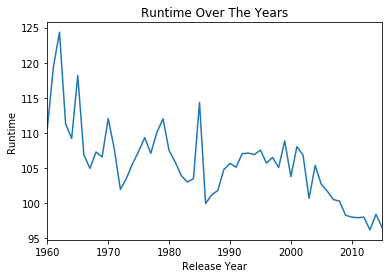

In [54]:
#Runtime of Movies released over the years 

Runtime_Trend = Mean_trend['runtime'].plot.line()
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.title('Runtime Over The Years')


#### REVENUE FROM THE MOVIES RELEASED OVER THE YEARS

To find out this trend, I'm still using the same data frame Mean_trend,  grouped by release year with the mean function. From the below line plot, it looks like the revenue of the movies released has had increases over the years untill mid of 2000 and seems to have decreased. At this point in our analysis, we do not have any idea of why there is a decrease in the revenue yet. This needs further investigation.

Text(0.5,1,'Revenue Over The Years')

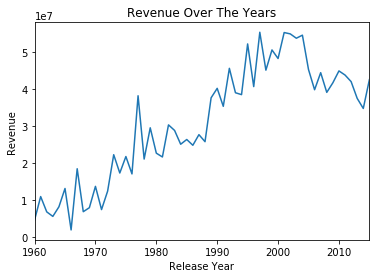

In [55]:
#Revenue from the Movies released over the years 

Revenue_Trend = Mean_trend['revenue'].plot.line()
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Revenue Over The Years')


### RESEARCH QUESTION 2

How is  Revenue Correlated with the variables - Popularity, Vote count, Budget, Runtime? 

In the below cell, I'm using the Corr funtion to calculate the Pearson coefficient to determine, the correlation between the variables in the dataset. Looking at the output, and the variables in the point of my interest, Revenue is positively correlated with Popularity, Vote count and Budget with the correlation coefficent of 0.75, 0.80, 0.90 and Revenue is negatively correlated with runtime with the correlation coefficient of -0.46. To confirm this further, I'm using scatter plot to visualize and look at the correlations.

In [56]:
#Calculating the Correlation coefficient
Mean_trend.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count
id,1.000000,0.612610,0.100292,0.152558,-0.441775,0.539964
popularity,0.612610,1.000000,0.668215,0.759156,-0.488974,0.849314
budget,0.100292,0.668215,1.000000,0.906124,-0.401485,0.782026
revenue,0.152558,0.759156,0.906124,1.000000,-0.466239,0.809243
runtime,-0.441775,-0.488974,-0.401485,-0.466239,1.000000,-0.612715
vote_count,0.539964,0.849314,0.782026,0.809243,-0.612715,1.000000


#### CORRELATION BETWEEN REVENUE AND POPULARITY

To find out the correlation between these two trends, I'm using scatter plot to plot the revenue data against popularity ratings from the Mean_trend data frame which has the data grouped by release year. From the below scatter plot, it looks like Revenue and popularity are closely correlated exceot two to three data points from the plot which will need to be analyzed further.

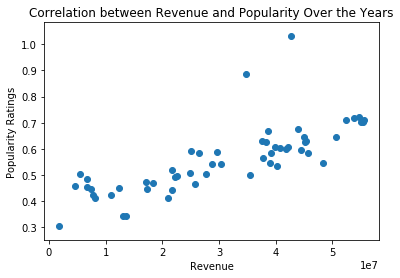

In [57]:
#Correlation between Revenue and popularity
plt.scatter(x=Mean_trend['revenue'], y=Mean_trend['popularity'])
plt.xlabel('Revenue')
plt.ylabel('Popularity Ratings')
plt.title('Correlation between Revenue and Popularity Over the Years');


#### CORRELATION BETWEEN REVENUE AND VOTE COUNT

To find out the correlation between these two trends, I'm using scatter plot to plot the revenue data against vote counts from the Mean_trend data frame which has the data grouped by release year. From the below scatter plot, it looks like Revenue and vote counts are also closely correlated positively except few data points from the plot which will need to be analyzed further.

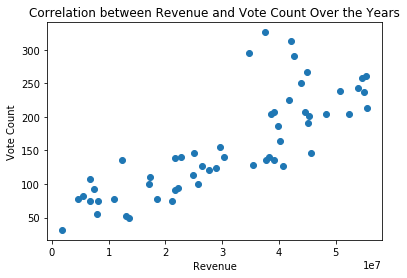

In [58]:
plt.scatter(x=Mean_trend['revenue'], y=Mean_trend['vote_count'])
plt.xlabel('Revenue')
plt.ylabel('Vote Count')
plt.title('Correlation between Revenue and Vote Count Over the Years');


#### CORRELATION BETWEEN REVENUE AND BUDGET

To find out the correlation between these two trends, I'm using scatter plot to plot the revenue data against budget from the Mean_trend data frame which has the data grouped by release year. From the below scatter plot, it looks like Revenue and Budget are also closely correlated positively.

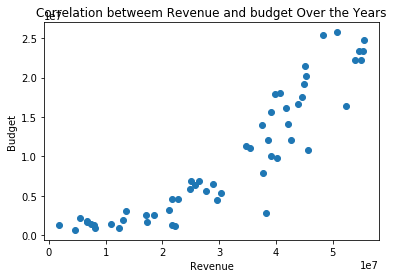

In [59]:
plt.scatter(x=Mean_trend['revenue'], y=Mean_trend['budget'])
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title('Correlation betweem Revenue and budget Over the Years');

#### CORRELATION BETWEEN REVENUE AND RUNTIME

To find out the correlation between these two trends, I'm using scatter plot to plot the revenue data against budget from the Mean_trend data frame which has the data grouped by release year. From the below scatter plot, it looks like Revenue and Runtime are negatively correlated.

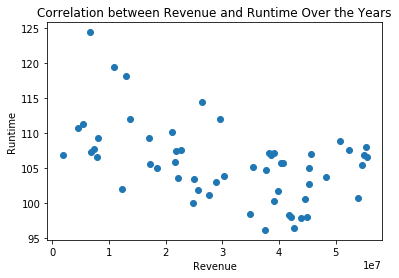

In [60]:
plt.scatter(x=Mean_trend['revenue'], y=Mean_trend['runtime'])
plt.xlabel('Revenue')
plt.ylabel('Runtime')
plt.title('Correlation between Revenue and Runtime Over the Years');

<a id='conclusions'></a>
## Conclusions


#### LIMITATIONS 

In this project, the variables that we analyzed such as budget and revenue might be in different currencies considering the TMDb data set contains movies from all around the world. I have assumed it to be in USD and carried forward with my analysis. Also, the variables such a popularity rating and vote counts are not defined on the basis of a particular group of people or with any specified qualities which are few of the limitations in this analysis. One more limitation of the project is that, I have not analyzed the outliers thoroughly.


#### SUMMARY

Finally, from thsi analysis, I have made the following conclusions. 

1. Increase in movie releases over the years 
2. Increase in popularity over the years
3. Increase in Revenue till mid 2000's and there is a decrease later
4. Decrease in runtime over the years 
5. Revenue is positively correlated with Vote count, budget and Popularity
6. Revenue is negatively correlated with the Runtime.

The conclusions are merely based on correlations and not on causation. 


In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0